## 导入Google Colab目录

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


## 创建文件夹

创建两个文件夹，一个cat，一个dog。

In [ ]:
from fastai.vision import *
path = Path(root_dir + 'DeepLearning/Datasets2/')
 
dest1 = path/'cat'
dest1.mkdir(parents=True, exist_ok=True)
dest2 = path/'dog'
dest2.mkdir(parents=True, exist_ok=True)

## 构建数据集

在`Google图片`上搜`cat`，浏览一会儿，按`F12`，再点`console`，或者`Ctrl+Shift+J`打开控制台，直接粘贴以下五段代码：

```javascript
function simulateRightClick( element ) {
    var event1 = new MouseEvent( 'mousedown', {
        bubbles: true,
        cancelable: false,
        view: window,
        button: 2,
        buttons: 2,
        clientX: element.getBoundingClientRect().x,
        clientY: element.getBoundingClientRect().y
    } );
    element.dispatchEvent( event1 );
    var event2 = new MouseEvent( 'mouseup', {
        bubbles: true,
        cancelable: false,
        view: window,
        button: 2,
        buttons: 0,
        clientX: element.getBoundingClientRect().x,
        clientY: element.getBoundingClientRect().y
    } );
    element.dispatchEvent( event2 );
    var event3 = new MouseEvent( 'contextmenu', {
        bubbles: true,
        cancelable: false,
        view: window,
        button: 2,
        buttons: 0,
        clientX: element.getBoundingClientRect().x,
        clientY: element.getBoundingClientRect().y
    } );
    element.dispatchEvent( event3 );
}
 
 
 
 
 
 
function getURLParam( queryString, key ) {
    var vars = queryString.replace( /^\?/, '' ).split( '&' );
    for ( let i = 0; i < vars.length; i++ ) {
        let pair = vars[ i ].split( '=' );
        if ( pair[0] == key ) {
            return pair[1];
        }
    }
    return false;
}
 
 
 
 
 
 
 
function createDownload( contents ) {
    var hiddenElement = document.createElement( 'a' );
    hiddenElement.href = 'data:attachment/text,' + encodeURI( contents );
    hiddenElement.target = '_blank';
    hiddenElement.download = 'urls.txt';
    hiddenElement.click();
}
 
 
 
 
 
 
 
 
 
 
function grabUrls() {
    var urls = [];
    return new Promise( function( resolve, reject ) {
        var count = document.querySelectorAll(
        	'.isv-r a:first-of-type' ).length,
            index = 0;
        Array.prototype.forEach.call( document.querySelectorAll(
        	'.isv-r a:first-of-type' ), function( element ) {
            // using the right click menu Google will generate the
            // full-size URL; won't work in Internet Explorer
            // (http://pyimg.co/byukr)
            simulateRightClick( element.querySelector( ':scope img' ) );
            // Wait for it to appear on the <a> element
            var interval = setInterval( function() {
                if ( element.href.trim() !== '' ) {
                    clearInterval( interval );
                    // extract the full-size version of the image
                    let googleUrl = element.href.replace( /.*(\?)/, '$1' ),
                        fullImageUrl = decodeURIComponent(
                        	getURLParam( googleUrl, 'imgurl' ) );
                    if ( fullImageUrl !== 'false' ) {
                        urls.push( fullImageUrl );
                    }
                    // sometimes the URL returns a "false" string and
                    // we still want to count those so our Promise
                    // resolves
                    index++;
                    if ( index == ( count - 1 ) ) {
                        resolve( urls );
                    }
                }
            }, 10 );
        } );
    } );
}
 
 
 
 
 
 
 
 
grabUrls().then( function( urls ) {
    urls = urls.join( '\n' );
    createDownload( urls );
} );
```

同样的操作搜索`dog`。

把下载的txt改名分别为：cat.txt、dog.txt，为后续工作做准备

## 下载数据集

将`cat.txt`和`dog.txt`文件上传于`path`目录下，执行如下命令：

In [ ]:
download_images(path/'cat.txt', dest1, max_pics=120)
download_images(path/'dog.txt', dest2, max_pics=120)

Error https://www.washingtonpost.com/resizer/uwlkeOwC_3JqSUXeH8ZP81cHx3I=/arc-anglerfish-washpost-prod-washpost/public/HB4AT3D3IMI6TMPTWIZ74WAR54.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


> 其中使用了`fast.ai.vision.data`的`download_images`,指定txt文件的位置，存放图片的目的文件夹，最大的图片数目，最大处理线程数目

## 数据清理

下载下来的图片格式（`jpeg`、`png`、`gift`等）大小都不一致，需要进行清理，`fast.ai`提供了一个`verify_images`的工具，可以对图像进行基本的清理操作：

In [ ]:
classes = ['cat','dog']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cat


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:987: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/DeepLearning/Datasets2/cat/00000039.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/DeepLearning/Datasets2/cat/00000028.jpg'>
dog


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:987: UserWarning: Couldn't allocate palette entry for transparency
  warnings.warn("Couldn't allocate palette entry for transparency")


> `verify_images` 会查看该图片是否损坏、是否使用合适的channel数目，是否需要调整到指定大小或超过了限定大小

## 查看部分图片

`fast.ai`通过类`ImageDataBunch`进行数据的组织

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

可以随机查看一组数据

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

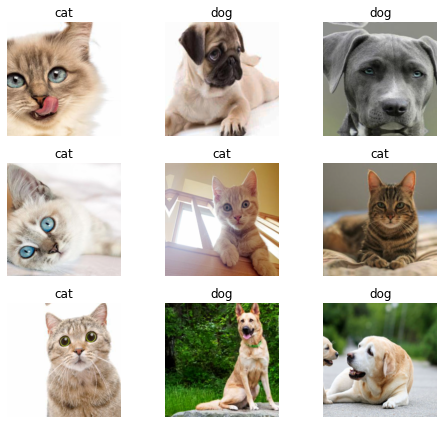

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

## 训练模型

使用预训练模型`resnet34`进行迁移学习：

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.172639,0.687638,0.276596,00:46
1,0.715001,0.246741,0.106383,00:46
2,0.524886,0.033620,0.000000,00:46
3,0.408488,0.008482,0.000000,00:46


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

解冻模型，修改学习率，再训练几轮：

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.137841,0.362603,0.148936,00:48
1,0.717203,0.497480,0.127660,00:46
2,0.532314,0.338967,0.085106,00:46
3,0.407410,0.189146,0.063830,00:46


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

调整学习率继续学习

In [ ]:
learn.fit_one_cycle(10,max_lr=slice(1e-4,3e-4))
learn.save('stage-2')

epoch,train_loss,valid_loss,error_rate,time
0,0.115359,0.114586,0.042553,00:45
1,0.062113,0.068654,0.042553,00:46
2,0.061450,0.041762,0.021277,00:46
3,0.051107,0.029947,0.000000,00:46
4,0.046757,0.019579,0.000000,00:46
5,0.066720,0.015556,0.000000,00:46
6,0.063555,0.011138,0.000000,00:46
7,0.056562,0.009309,0.000000,00:47
8,0.053216,0.008640,0.000000,00:46
9,0.053072,0.009092,0.000000,00:47


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

`fast.ai`提供了`ClassificationInterpretation`能够从结果中高效的进行分析

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

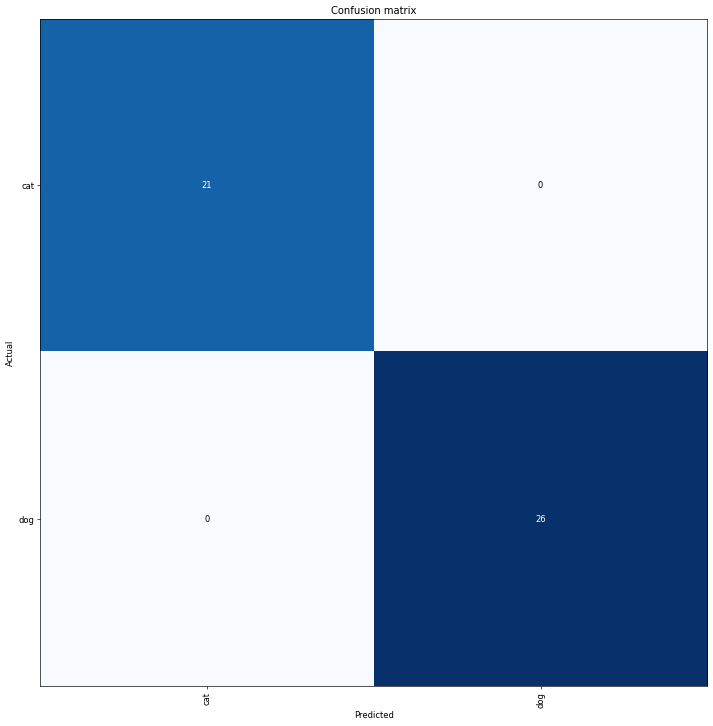

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

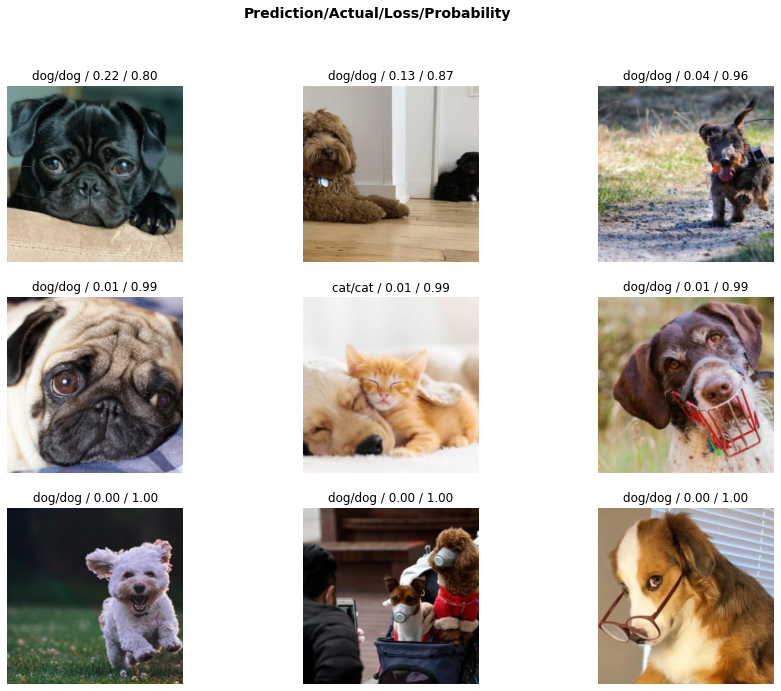

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))